# Group Dynamics

In this activity, you’ll use the Pandas `groupby` function to calculate the aggregate statistics of a DataFrame.

Instructions:

1. Import `crypto_data.csv` into a Pandas DataFrame by using `read_csv`. Set the index as `data_date`. Be sure to include the `parse_dates` and `infer_datetime_format` parameters. Review the first five rows of the DataFrame.

2. Drop the `data_time` and `timestamp` columns from the DataFrame. Remove any missing values from the remaining columns. Review the first five rows of the cleaned DataFrame.

3. Group the DataFrame by `cryptocurrency`, and then plot the `data_priceUsd` for each cryptocurrency on a single plot.

4. Calculate the `average` price across two years for each cryptocurrency.

5. Calculate the `max` price across two years for each cryptocurrency.

6. Calculate the `min` price across two years for each cryptocurrency.

7. Answer the following questions in your Jupyter notebook:

    * Which cryptocurrency do you recommend investing in?

    * Which cryptocurrency had the largest swing in prices?

References:

[Pandas groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)


In [52]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np

## Step 1: Import `crypto_data.csv` into a Pandas DataFrame by using `read_csv`. Set the index as `data_date`. Be sure to include the `parse_dates` and `infer_datetime_format` parameters. Review the first five rows of the DataFrame.

In [2]:
# Using the read_csv function and the Path module, read in the crypto_data.csv file
# Use the 'data_date' column as the index. Include the parse_dates and infer_datetime_format parameters.
crypto_data_df = pd.read_csv(Path('../Resources/crypto_data.csv'),index_col='data_date',parse_dates=True,infer_datetime_format=True)

# Review the first five rows of the DataFrame
crypto_data_df.head()

,cryptocurrency,data_priceUsd,data_time,timestamp
data_date,,,,
2017-05-09,bitcoin,NaN,1.494288e+12,1.557285e+12
2017-05-10,bitcoin,1743.723523,1.494374e+12,NaN
2017-05-11,bitcoin,1828.678209,1.494461e+12,NaN
2017-05-12,bitcoin,1776.443919,1.494547e+12,NaN
2017-05-13,bitcoin,1714.964198,1.494634e+12,NaN


## Step 2: Drop the `data_time` and `timestamp` columns from the DataFrame. Remove any missing values from the remaining columns. Review the first five rows of the cleaned DataFrame.

In [5]:
# Drop the data_time and timestamp columns
crypto_data_df = crypto_data_df.drop(['data_time','timestamp'],axis=1)

# Remove any rows with missing values
crypto_data_df = crypto_data_df.dropna()

# Review the first five rows of the cleaned DataFrame
crypto_data_df.head()

,cryptocurrency,data_priceUsd
data_date,,
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
2017-05-14,bitcoin,1789.278913


## Step 3: Group the DataFrame by `cryptocurrency`, and then plot the `data_priceUsd` for each cryptocurrency on a single plot.

cryptocurrency
bitcoin         Axes(0.125,0.2;0.775x0.68)
bitcoin-cash    Axes(0.125,0.2;0.775x0.68)
ethereum        Axes(0.125,0.2;0.775x0.68)
litecoin        Axes(0.125,0.2;0.775x0.68)
ripple          Axes(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

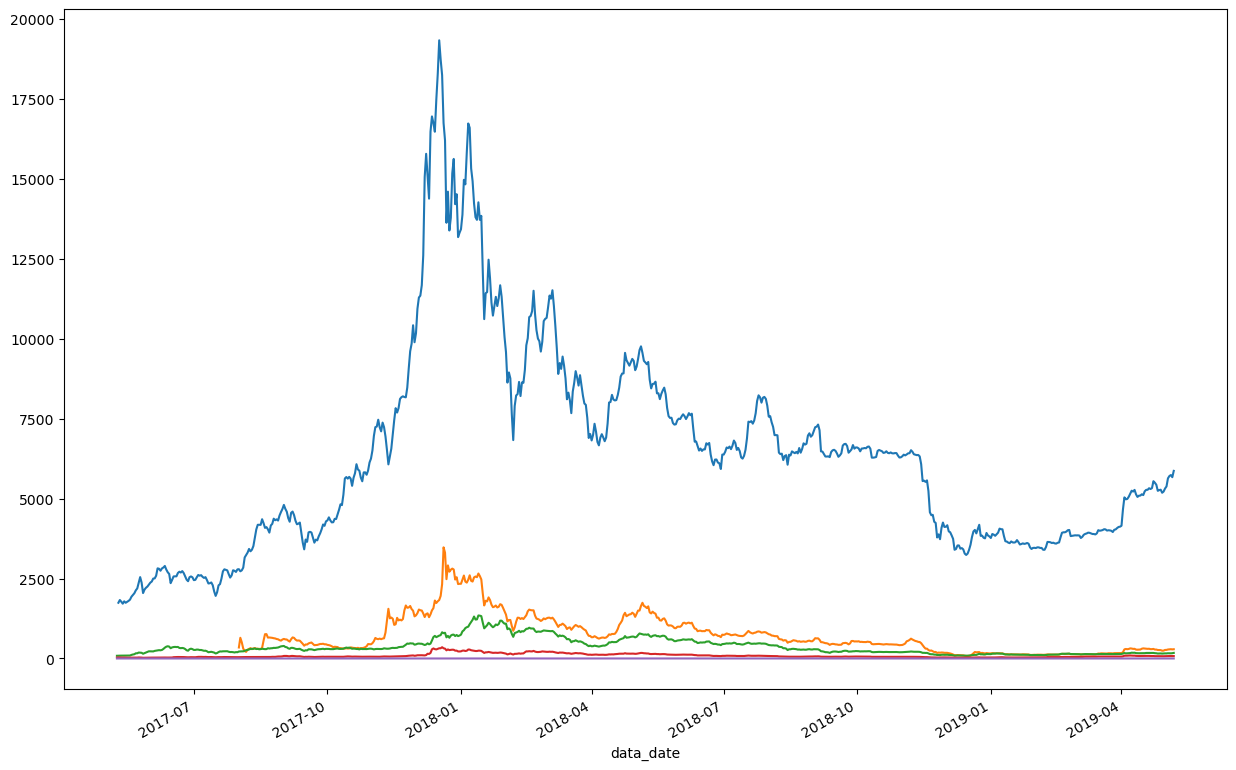

In [17]:
# Group the DataFrame by cryptocurrency and then plot the data_priceUSD
# The plot should include parameters for legend and figsize.
crypto_data_plot = crypto_data_df.groupby('cryptocurrency')['data_priceUsd'].plot(figsize=(15,10))

# View the plot
crypto_data_plot

<Axes: xlabel='data_date'>

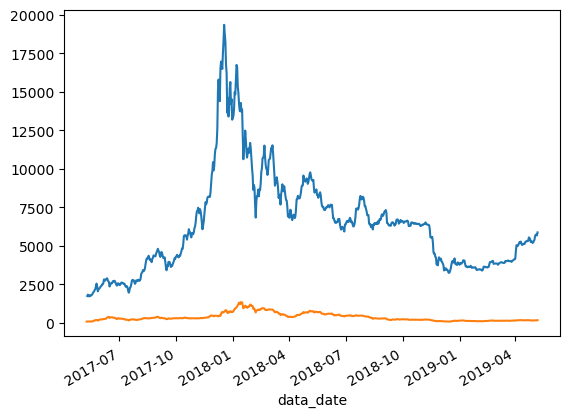

In [25]:
# with pivot table?
import matplotlib.pyplot as plt
# Group the DataFrame by cryptocurrency and then plot the data_priceUSD
# The plot should include parameters for legend and figsize.
fig, ax = plt.subplots()

bitcoin_df = crypto_data_df[crypto_data_df['cryptocurrency']=='bitcoin']
bitcoin_df['data_priceUsd'].plot(ax=ax)

ethereum_df = crypto_data_df[crypto_data_df['cryptocurrency']=='ethereum']
ethereum_df['data_priceUsd'].plot(ax=ax)


## Step 4: Calculate the `average` price across two years for each cryptocurrency.

In [36]:
# Determine average price, or mean, for each cryptocurrency
crypto_data_avg = crypto_data_df.groupby('cryptocurrency').mean()

# View the resulting Series
crypto_data_avg['data_priceUsd']

cryptocurrency
bitcoin         6323.018445
bitcoin-cash     733.997564
ethereum         369.037426
litecoin          85.618264
ripple             0.475986
Name: data_priceUsd, dtype: float64

## Step 5: Calculate the `max` price across two years for each cryptocurrency.

In [37]:
# Determine max price for each cryptocurrency
crypto_data_max = crypto_data_df.groupby('cryptocurrency').max()

# View the resulting Series
crypto_data_max['data_priceUsd']

cryptocurrency
bitcoin         19339.922660
bitcoin-cash     3476.844119
ethereum         1346.037491
litecoin          352.713468
ripple              2.999459
Name: data_priceUsd, dtype: float64

## Step 6: Calculate the `min` price across two years for each cryptocurrency.

In [38]:
# Determine min price for each cryptocurrency
crypto_data_min = crypto_data_df.groupby('cryptocurrency').min()

# View the resulting Series
crypto_data_min['data_priceUsd']

cryptocurrency
bitcoin         1714.964198
bitcoin-cash      78.977344
ethereum          84.374014
litecoin          22.550468
ripple             0.154144
Name: data_priceUsd, dtype: float64

## Step 7: Answer the following questions:

In [55]:
crypto_returns = crypto_data_df.pivot(columns='cryptocurrency',values='data_priceUsd').dropna().pct_change()
crypto_returns.mean()

cryptocurrency
bitcoin         0.001889
bitcoin-cash    0.003436
ethereum        0.000780
litecoin        0.002462
ripple          0.002939
dtype: float64

In [56]:
crypto_returns.std()

cryptocurrency
bitcoin         0.037767
bitcoin-cash    0.093402
ethereum        0.047472
litecoin        0.058314
ripple          0.067318
dtype: float64

**Question:** Which cryptocurrency had the largest swing in prices?

**Answer:**  We would need to analyze the standard deviation of the change in returns to properly answer this. After doing so above, 'bitcoin-cash' has the highest swing in prices

In [57]:
crypto_sharpe_ratios = (crypto_returns.mean() * 252) / (crypto_returns.std() * np.sqrt(252))
crypto_sharpe_ratios

cryptocurrency
bitcoin         0.793883
bitcoin-cash    0.584030
ethereum        0.260701
litecoin        0.670312
ripple          0.693016
dtype: float64

**Question:** Which cryptocurrency do you recommend investing in?

**Answer:** I would want to first compute the Sharpe ratio for each cryptocurrency to determine which provides the most return relative to its risk. As computed above it appeats that we would receive the most return relative to risk with bitcoin; therefore, that is the cryptocurrency I would recommend investing in.